# Bag of Words Yelp Sentiment Analysis Project

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import sklearn
import json

from collections import Counter



## 1. Exploring the data set
Here we explore the yelp dataset review. We use a dataset with Yelp reviews and a 1-5 star rating associated with it to learn how to use the bag of words model to conduct sentiment analysis.

In [96]:
### Uncomment to use Yelp Reviews dataset
# df = pd.read_csv('yelp_academic_dataset_review.csv') 
###

### Uncomment this to use the Airplane Tweets dataset
df = pd.read_csv('Tweets.csv') 
###

We simply grab all the one star and five star data from the dataset here. 

In [97]:

### UNCOMMENT FOR YELP DATASET
# # Get one star reviews and label them with -1
# dfOnes = df[df['stars'] == 1]
# dfOnes = dfOnes.head(10000)
# dfOnes['stars'] = dfOnes['stars'].apply(lambda x: -1)

# # Get five star reviews and label them with 1
# print("Shape of the ones input: ")
# print(dfOnes.shape)
# dfFives = df[df['stars'] == 5]
# dfFives = dfFives.head(10000)
# dfFives['stars'] = dfFives['stars'].apply(lambda x: 1)

# print("Shape of the fives input: ")
# print(dfFives.shape)
# dfCombined = pd.concat([dfOnes, dfFives], axis=0)

# dfCombined=dfCombined.rename(columns = {'stars':'class'})
###


### UNCOMMENT FOR AIRLINE DATA
dfCombined = df[['airline_sentiment', 'text']]
dfCombined = dfCombined[dfCombined.airline_sentiment != 'neutral']
dfCombined['airline_sentiment'] = dfCombined['airline_sentiment'].replace(['positive','negative'],[1, -1])
dfCombined=dfCombined.rename(columns = {'airline_sentiment':'class'})
###




dfCombined = dfCombined.sample(frac=1)

dfTrainset = dfCombined.head(int(len(dfCombined.index) * .8))
dfTestset = dfCombined.tail(int(len(dfCombined.index) * .2))

trainX = np.asarray(dfTrainset['text'])
trainY = np.asarray(dfTrainset['class'])

testX = np.asarray(dfTestset['text'])
testY = np.asarray(dfTestset['class'])

print('Data Frame of reviews:')


dfCombined

Data Frame of reviews:


,class,text
11423,-1,@USAirways a $100 @Samsonite - totaled. Not ha...
13914,-1,@AmericanAir ok. Pilots are looking for agents...
3787,-1,@united rebooked. This one is Late Flight too.
1238,-1,@united working with Lisa J at ORD. she's work...
3633,-1,@united can you get a gate for UA4727? Turrible.
8438,1,I know you have a lot of baggage... But i want...
7551,-1,@JetBlue they are now being sent off the plane...
6768,-1,@JetBlue upset with the lack of communication ...
6189,-1,@SouthwestAir I'm smashed into a window by the...
3017,-1,@united I did and then she made me feel guilty...


### Part A: Review Data Sampling

Try to run the below block multiple times to see different reviews and the classification assigned to the review. Please comment below on what interesting aspects of the reviews you find to lead to certain classifications. What distinguishes between a classification of 1 and one of -1.

In [104]:
sample = dfCombined.sample() 
print("Text: " + sample['text'].values[0]  + "\n")
print("Classification: " + str(sample['class'].values[0]))

Text: @JetBlue 2 words: "staff training." What a joke-

Classification: -1


#### RESPONSE: 

In [105]:
# Any meaningful answer that discusses words that are more commonly used in positive reviews vs
# negative reviews or length analysis will suffice

### Part B: Corpus Examination

We are looking of the combined string of every review in the usable dataset. In the provided space below use a histogram to visualize the frequency of the 25 most common words. Then answer the questions that follow. Hint: The most_common funtion for the counter may come in handy.

In [106]:
allText = ' '.join(dfCombined["text"])
words = allText.split() 

wordCounts = Counter()
for word in words:
    wordCounts[word] += 1


Length of all text:
1260768
Number of unique words:
25314


<BarContainer object of 25 artists>

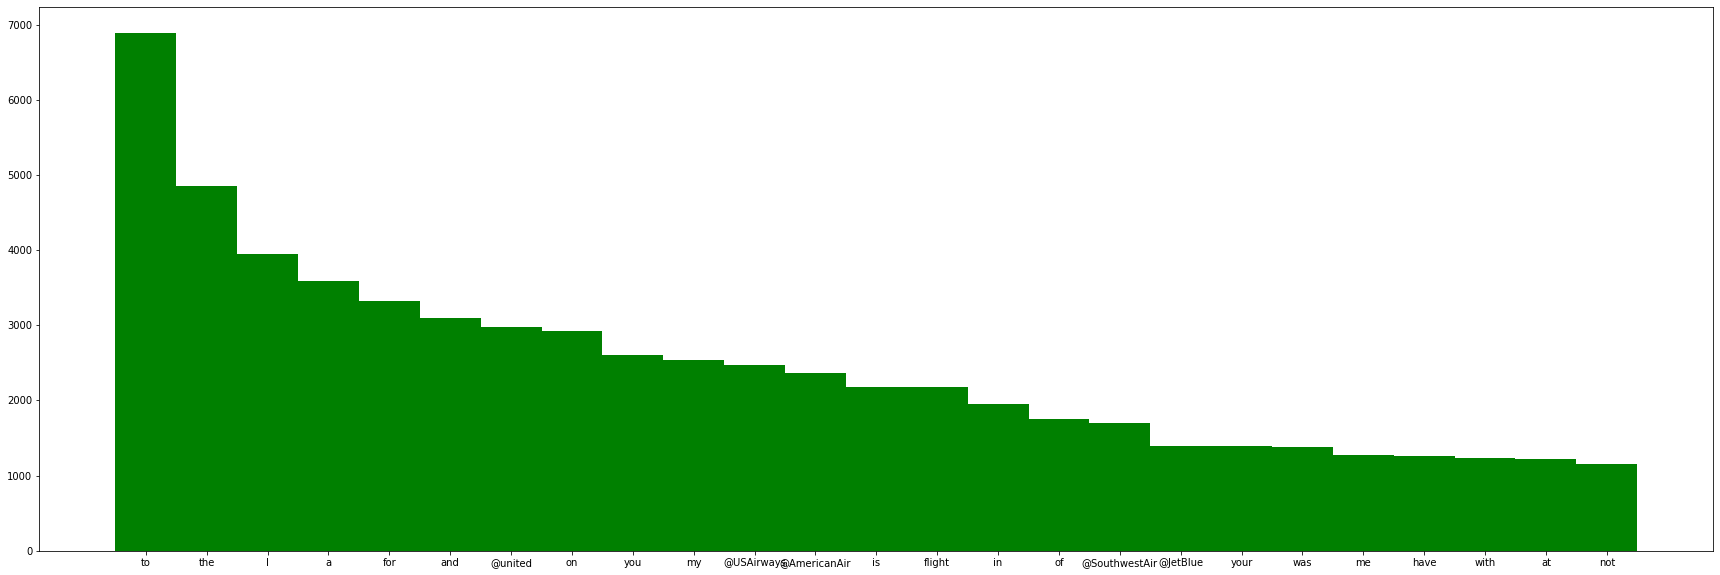

In [108]:
print("Length of all text:")
print(len(allText))
print("Number of unique words:")
print(len(wordCounts))
### Begin Part B
mostCommon = dict(wordCounts.most_common(25))

fig, ax = plt.subplots(figsize=(30,10))
ax.bar(mostCommon.keys(), mostCommon.values(), 1, color='g')
### End Part B

#### What do you notice about the most common words? Do you think they useful in classifying a review?

#### RESPONSE: 

In [109]:
# blah

Look at some of the least common words below. Define the variable least common.

In [110]:
### Begin Part B
leastCommon = dict(wordCounts.most_common()[:-10-1:-1])
### End Part B

In [111]:
print(leastCommon)

{'thru...': 1, 'credentials.': 1, 'signing': 1, 'volume?': 1, '#disappointing': 1, '#Noaccountability': 1, 'scenes.': 1, 'front"': 1, '@Gregm528': 1, 'am!': 1}


#### What do you notice about the least common words? Do you think they useful in classifying a review

#### RESPONSE: 

In [112]:
# blah

### Part C: Identifying Unique Most Common Words of Each Classification

We now want to find the most common words in each classification set that is not included in the other. Basically, we find the most common words in five star reviews that are not in the most common set of words for one star reviews and vice versa. Fill out the below code and answer the following questions.

In [115]:
allTextFives = ' '.join(dfFives["text"])
wordsFives = allTextFives.split() 

### Begin Part C
# Find the 100 most common words that are found in the five star reviews
wordCountsFives = Counter()
for word in wordsFives:
    wordCountsFives[word] += 1
    
mostCommonFives = dict(wordCountsFives.most_common(100))
### End Part C



allTextOnes = ' '.join(dfOnes["text"])
wordsOnes = allTextOnes.split() 

### Begin Part C
# Find the 100 most common words that are found in the one star reviews
wordCountsOnes = Counter()
for word in wordsOnes:
    wordCountsOnes[word] += 1
mostCommonOnes = dict(wordCountsOnes.most_common(100))
### End Part C

### Begin Part C
# Subtract sets in order to find the most common unique words for each set
fivesUnique = { k : mostCommonFives[k] for k in set(mostCommonFives) - set(mostCommonOnes) }
onesUnique = { k : mostCommonOnes[k] for k in set(mostCommonOnes) - set(mostCommonFives) }
### End Part C

print("Most common words in one star reviews: ")
print(onesUnique)
print()
print("Most common words in five star reviews: ")
print(fivesUnique)

Most common words in one star reviews: 
{'no': 3909, 'went': 2080, 'order': 2016, 'told': 3140, 'did': 2248, 'minutes': 1854, "don't": 2405, 'over': 2152, 'she': 3961, 'customer': 1774, "didn't": 2615, 'said': 3075, 'never': 2886, 'going': 1762, 'asked': 2314, 'ordered': 1768, 'her': 2675, 'could': 2290, 'who': 1849, 'then': 2142, 'after': 2387, 'came': 2090}

Most common words in five star reviews: 
{'can': 1671, 'Great': 1211, 'best': 1774, 'also': 1553, 'love': 1544, '-': 1372, "I'm": 1184, 'always': 1721, 'than': 1038, 'definitely': 1342, 'great': 3288, 'really': 1749, 'recommend': 1257, 'has': 1425, 'friendly': 1167, 'staff': 1198, 'nice': 1136, "it's": 1247, 'made': 1148, "I've": 1590, 'come': 1071, 'some': 1460}


#### What do you notice about these words above? Are they more respresentitive of each classification? What words do you thing are good indicators of each review? What words are not so good?

#### RESPONSE: 

In [116]:
# blah

## 2. Testing different Models

### Part D: Baseline Model

To see the effect of the bag of words model, we first build a naive baseline model that tries to simply classify the model based on the length of the review. Complete the code below and answer the following questions.

In [119]:
def baseline_featurize(review):
    ### Begin Part D
    # Featurize the data based on the length of the review
    return np.asarray([len(review)])
    ### End Part D

def trainModel(X_featurized, y_true):
    ### Begin Part D
    # Return a model that uses logistic regression
    model = LogisticRegression()
    model.fit(X_featurized, y_true)
    return model
    ### End Part D

def accuracyData(model, X_featurized, y_true):
    ### Begin Part D
    # Predict the data given the model and corresponding data. Return the accuracy 
    # as the percentage of values that were correctly classified. Also print a confusion
    # matrix to help visualize the error. Hint: Look at sklearn.metrics.confusion
    y_predict = model.predict(X_featurized)
    total_num = len(y_true)
    total_correct = np.sum([1 if y_predict[i] == y_true[i] else 0 for i in range(len(y_predict))])
    total_incorrect = total_num - total_correct
    accuracy = total_correct / total_num
    print(sklearn.metrics.confusion_matrix(y_true, y_predict, labels=[-1, 1]))
    print(accuracy)
    ### End Part D
    return accuracy
    

In [120]:
print("Beginning Train Featurization")
featurized_data = np.array(list(map(baseline_featurize, trainX)))
print("Beginning Training")
model = trainModel(featurized_data, np.asarray(dfTrainset["class"]))
print("Beginning Test Featurization")
testFeaturized_data = np.array(list(map(baseline_featurize, testX)))
print("Accuracy:")
accuracyData(model, testFeaturized_data, np.asarray(dfTestset["class"]))

Beginning Train Featurization
Beginning Training
Beginning Test Featurization
Accuracy:
[[1800   56]
 [ 386   66]]
0.8084922010398613


0.8084922010398613

#### What did you get as your accuracy? Does that surprise you? Why or why not?

#### RESPONSE: 

In [121]:
# Stuff

### Part E: Bag of Words Model

We now implement the bag of words model below. Please complete the following code segments and answer the following questions.

In [122]:
# We create a wordsOrdered list that contains all words in the train data that shows up more
# than one time

modifiedCounter = Counter(el for el in wordCounts.elements() if wordCounts[el] > 1)
wordsOrdered = [key for key, _ in modifiedCounter.most_common()]

def bag_of_words_featurize(review):
    ### Begin Part E
    # Code the featurization for the bag of words model. Return the corresponding vector
    reviewWords = review.split() 
    vec = np.zeros(len(modifiedCounter))
    for word in reviewWords:
        if word in wordsOrdered:
            vec[wordsOrdered.index(word)] += 1
    return vec
    ### End Part E        

Run the below script and see how well the bag of words model performs. Warning: this block may
around 10 minutes to run.

In [123]:
print("Beginning Train Featurization")
currBagFeaturized_data = np.array(list(map(bag_of_words_featurize, trainX)))
print("Beginning Training")
currBagModel = trainModel(currBagFeaturized_data, np.asarray(dfTrainset["class"]))
print("Beginning Test Featurization")
testFeaturizedBag_data = np.array(list(map(bag_of_words_featurize, testX)))
print("Accuracy:")
accuracyData(currBagModel, testFeaturizedBag_data, np.asarray(dfTestset["class"]))

Beginning Train Featurization
Beginning Training
Beginning Test Featurization
Accuracy:
[[1791   65]
 [ 130  322]]
0.9155112651646448


0.9155112651646448

#### What was your accuracy? Does that surprise you? Why did it perform as it did?

#### RESPONSE: 

In [124]:
# ANS

In [125]:
intermed = dict(enumerate(wordsOrdered))
wordPosition = {y:x for x,y in intermed.items()}

### Part F: Examining Bag of Words Weights

We have a function that gets the weight of a word below in the weight vector generated from the bag of words model. Answer the question below

In [130]:
def weightOfWords(word):
    if word not in wordPosition.keys():
        print("Word does not exist in model, no weight is assigned to it")
        return
    return currBagModel.coef_[0][wordPosition[word]]


In [132]:
# Try different words here
weightOfWords('good')

1.6294962084379272

#### List three words that have positive weights. List three that have negative weights. Explain why that makes sense.

#### RESPONSE: 

In [133]:
# Any set of words that works is sufficient. Ex: 'him', 'her', 'bad' are negatively weighted ...

### Part G: Binary Bag of Words

There are times when we only want to identify whether a word is in a review or not and disregard the number of times it has shown up in the review. In this case, we find binary bag of words more useful that our regualar bag of words model. Hypothesize which model should run better given the examination of the dataset. Complete the code below and answer the questions below.

In [134]:
def bag_of_words_binary_featurize(review):
    ### Begin Part G
    reviewWords = review.split() 
    vec = np.zeros(len(modifiedCounter))
    for word in reviewWords:
        if word in wordsOrdered:
            vec[wordsOrdered.index(word)] = 1
    return vec
    ### End Part G

Run the below script and see how well the bag of words model performs. Warning: this block may
around 10 minutes to run.

In [136]:
print("Beginning Train Featurization")
currBinBagFeaturized_data = np.array(list(map(bag_of_words_binary_featurize, trainX)))
print("Beginning Training")
currBinBagModel = trainModel(currBinBagFeaturized_data, np.asarray(dfTrainset["class"]))
print("Beginning Test Featurization")
testFeaturizedBinBag_data = np.array(list(map(bag_of_words_binary_featurize, testX)))
print("Accuracy:")
accuracyData(currBinBagModel, testFeaturizedBinBag_data, np.asarray(dfTestset["class"]))

Beginning Train Featurization
Beginning Training
Beginning Test Featurization
Accuracy:
[[1791   65]
 [ 128  324]]
0.9163778162911612


0.9163778162911612

#### What was your accuracy percentage? Was it what you expected? How did it compare to the regular Bag of Words model?

#### RESPONSE:

In [83]:
# blah

### Part H: Bag of Words Negative Features

There are times where we also want to identify negative words as negative features instead of regular features. For example if we get a review: "The food is not good", the word "good" is used in a negative connotation and should be treated as such. Thus we make new features for the negative of each of our chosen words. Complete the code below and answer the following questions. 

In [137]:
def bag_of_words_neg_featurize(review):
    ### Begin Part H
    reviewWords = review.split() 
    vec = np.zeros(len(modifiedCounter)*2)
    isNegative = False
    for word in reviewWords:
        if word in wordsOrdered:
            if isNegative:
                vec[wordsOrdered.index(word)+len(modifiedCounter)] += 1
            else:
                vec[wordsOrdered.index(word)] += 1
            isNegative = False
        if "n't" in word or word == "not":
            isNegative = True
    return vec
    ### End Part H

Run the below script and see how well the bag of words model performs. Warning: this block may
around 10 minutes to run.

In [138]:
print("Beginning Train Featurization")
neg_data = np.array(list(map(bag_of_words_neg_featurize, trainX)))
print("Beginning Training")
negModel = trainModel(neg_data, np.asarray(dfTrainset["class"]))
print("Beginning Test Featurization")
testFeaturizedNeg_data = np.array(list(map(bag_of_words_neg_featurize, testX)))
print("Accuracy:")
accuracyData(negModel, testFeaturizedNeg_data, np.asarray(dfTestset["class"]))

Beginning Train Featurization
Beginning Training
Beginning Test Featurization
Accuracy:
[[1791   65]
 [ 130  322]]
0.9155112651646448


0.9155112651646448

#### How did this model perform? Is it as expected? Why did it perform this way?

#### RESPONSE:

In [139]:
# Bleh

### Part I: Negative Binary Features

Follow the code below and answer the questions below for combining the two features we worked on.

In [140]:
def bag_of_words_neg_binary_featurize(review):
    ### Begin Part I
    reviewWords = review.split() 
    vec = np.zeros(len(modifiedCounter)*2)
    isNegative = False
    for word in reviewWords:
        if word in wordsOrdered:
            if isNegative:
                vec[wordsOrdered.index(word)+len(modifiedCounter)] = 1
            else:
                vec[wordsOrdered.index(word)] = 1
            isNegative = False
        if "n't" in word or word == "not":
            isNegative = True
    return vec
    ### End Part I

Run the below script and see how well the bag of words model performs. Warning: this block may around 10 minutes to run.

In [141]:
print("Beginning Train Featurization")
negbin_data = np.array(list(map(bag_of_words_neg_binary_featurize, trainX)))
print("Beginning Training")
negBinModel = trainModel(negbin_data, np.asarray(dfTrainset["class"]))
print("Beginning Test Featurization")
testFeaturizedNegBin_data = np.array(list(map(bag_of_words_neg_binary_featurize, testX)))
print("Accuracy:")
accuracyData(negBinModel, testFeaturizedNegBin_data, np.asarray(dfTestset["class"]))

Beginning Train Featurization
Beginning Training
Beginning Test Featurization
Accuracy:
[[1788   68]
 [ 130  322]]
0.91421143847487


0.91421143847487

#### Was the result as expected? Why or why not?

#### RESPONSE:

In [89]:
# answer

## 3. Extra Credit

### Part J (OPTIONAL): Enhanced Model

In order to get extra credit, Try to create some sort of featurization below that will reach an accuraccy of .97 or higher. Ideas to keep in mind are the Bigram model that was discussed in the notes that takes consecutive words into account as well as methods to increase the number of features we use. Good luck!!

In [90]:
def bag_of_words_extra_credit_featurize(review):
    ### Begin Part J
    # User solution!
    ### End Part J

SyntaxError: unexpected EOF while parsing (<ipython-input-90-40da8d9b339a>, line 4)

In [91]:
print("Beginning Train Featurization")
ExtraBagFeaturized_data = np.array(list(map(bag_of_words_extra_credit_featurize, trainX)))
print("Beginning Training")
ExtraBagModel = trainModel(ExtraBagFeaturized_data, np.asarray(dfTrainset["class"]))
print("Beginning Test Featurization")
testFeaturizedBinBag_extra = np.array(list(map(bag_of_words_extra_credit_featurize, testX)))
print("Accuracy:")
accuracyData(ExtraBagModel, testFeaturizedBinBag_extra, np.asarray(dfTestset["class"]))

Beginning Train Featurization


NameError: name 'bag_of_words_extra_credit_featurize' is not defined

In [92]:
# EXTRA CREDIT:.....HELLo......(BIGRAM REMEMBER) 0.97 REQUIRED

In [93]:
# RUN EVERY WITH 1-2 and 4-5 STARS
# RUN EVERYTHING WITH NEW DATASET
# BIGRAMS, NUMPY ARRAYS

In [14]:
max_records = 140000
data = pd.read_json('yelp_academic_dataset_review.json', lines=True, chunksize = max_records)

df = pd.DataFrame()
for chunk in data:
    df = pd.concat([df, chunk])
    break
    
print(type(df))


df.to_csv(r'yelp_academic_dataset_review.csv', index = False)

<class 'pandas.core.frame.DataFrame'>


### ONLY RUN BELOW CODE IF YOU ARE ON THE YELP DATASET

In [94]:
### ONLY RUN BELOW CODE IF YOU ARE ON THE YELP DATASET 

# Get one star reviews and label them with -1
dfOnes = df[df['stars'] == 1]
dfOnes = dfOnes.head(10000)
dfOnes['stars'] = dfOnes['stars'].apply(lambda x: -1)


dfTwos = df[df['stars'] == 2]
dfTwos = dfTwos.head(10000)
dfTwos['stars'] = dfTwos['stars'].apply(lambda x: -1)

# Get five star reviews and label them with 1
print("Shape of the ones input: ")
print(dfOnes.shape)

dfFives = df[df['stars'] == 5]
dfFives = dfFives.head(10000)
dfFives['stars'] = dfFives['stars'].apply(lambda x: 1)

dfFours = df[df['stars'] == 4]
dfFours = dfFours.head(10000)
dfFours['stars'] = dfFours['stars'].apply(lambda x: 1)

print("Shape of the fives input: ")
print(dfFives.shape)
dfCombined = pd.concat([dfOnes, dfTwos, dfFours, dfFives], axis=0)
dfCombined=dfCombined.rename(columns = {'stars':'class'})
dfCombined = dfCombined.sample(frac=1)

dfTrainset = dfCombined.head(int(len(dfCombined.index) * .8))
dfTestset = dfCombined.tail(int(len(dfCombined.index) * .2))

trainX = np.asarray(dfTrainset['text'])
trainY = np.asarray(dfTrainset['class'])

testX = np.asarray(dfTestset['class'])
testY = np.asarray(dfTestset['class'])

print('Data Frame of reviews:')
dfCombined

KeyError: 'stars'

In [7]:
sample = dfTwos.sample() 
print("Text: " + sample['text'].values[0]  + "\n")
print("Class: " + str(sample['class'].values[0]))

Text: I've been here once and never again. $12 for a ticket? Really? This place doesn't really live up to the price. Also, choosing a seat for a movie that isn't a midnight release is stupid especially if you get in late like I did (bus was late). It makes finding your seat awkward. If I wanted fancy movie experiences and high prices, I'd choose to go to a theatre that should be that way--not one in a shopping mall.

Class: -1


In [8]:
sample = dfFours.sample() 
print("Text: " + sample['text'].values[0]  + "\n")
print("Claass: " + str(sample['class'].values[0]))

Text: I had been wanting to try Joe's Philly Steak & More for a long time, but my husband is vegetarian, so I'd been waiting for a good opportunity to go. Finally, my husband was away for the weekend and Joe's had a Groupon, so I decided that this was my chance. I got the Super Steak sandwich with steak, grilled onion, peppers, and mushrooms and Provolone cheese. I got the smaller size sandwich so that I wouldn't feel too guilty about getting a side dish too... I got the Joe's Potato with steak, grilled onions and cheez whiz. 

The sandwich and the baked potato were both excellent! The salty meatiness of the steak combined with the savory grilled onions and peppers, added with the grilled mushrooms and creaminess of the Provolone made for a wonderful taste combination! The baked potato was also a great choice. I was not too full, but very satisfied. It was warm and comforting and I would recommend Joe's Philly Steak & More to anyone who loves meat! Plus, they are open Monday thru Satur

In [12]:
allText = ' '.join(dfCombined["text"])
words = allText.split() 

wordCounts = Counter()
for word in words:
    wordCounts[word] += 1
    
modifiedCounter = Counter(el for el in wordCounts.elements() if wordCounts[el] > 1)
wordsOrdered = [key for key, _ in modifiedCounter.most_common()]

In [13]:
print("Beginning Train Featurization")
currBagFeaturized_data = np.array(list(map(bag_of_words_featurize, trainX)))
print("Beginning Training")
currBagModel = trainModel(currBagFeaturized_data, np.asarray(dfTrainset["class"]))
print("Beginning Test Featurization")
testFeaturizedBag_data = np.array(list(map(bag_of_words_featurize, testX)))
print("Accuracy:")
accuracyData(currBagModel, testFeaturizedBag_data, np.asarray(dfTestset["class"]))

Beginning Train Featurization
Beginning Training


NameError: name 'trainModel' is not defined

In [40]:
print("Beginning Train Featurization")
currBinBagFeaturized_data = np.array(list(map(bag_of_words_binary_featurize, trainX)))
print("Beginning Training")
currBinBagModel = trainModel(currBinBagFeaturized_data, np.asarray(dfTrainset["class"]))
print("Beginning Test Featurization")
testFeaturizedBinBag_data = np.array(list(map(bag_of_words_binary_featurize, testX)))
print("Accuracy:")
accuracyData(currBinBagModel, testFeaturizedBinBag_data, np.asarray(dfTestset["class"]))

Beginning Train Featurization
Beginning Training
Beginning Test Featurization
Accuracy:
[[3722  286]
 [ 327 3665]]
0.923375


0.923375

In [42]:
print("Beginning Train Featurization")
neg_data = np.array(list(map(bag_of_words_neg_featurize, trainX)))
print("Beginning Training")
negModel = trainModel(neg_data, np.asarray(dfTrainset["class"]))
print("Beginning Test Featurization")
testFeaturizedNeg_data = np.array(list(map(bag_of_words_neg_featurize, testX)))
print("Accuracy:")
accuracyData(negModel, testFeaturizedNeg_data, np.asarray(dfTestset["class"]))

Beginning Train Featurization
Beginning Training
Beginning Test Featurization
Accuracy:
[[3703  305]
 [ 301 3691]]
0.92425


0.92425

In [14]:
print("Beginning Train Featurization")
negbin_data = np.array(list(map(bag_of_words_neg_binary_featurize, trainX)))
print("Beginning Training")
negBinModel = trainModel(negbin_data, np.asarray(dfTrainset["class"]))
print("Beginning Test Featurization")
testFeaturizedNegBin_data = np.array(list(map(bag_of_words_neg_binary_featurize, testX)))
print("Accuracy:")
accuracyData(negBinModel, testFeaturizedNegBin_data, np.asarray(dfTestset["class"]))

Beginning Training
Beginning Test Featurization
Accuracy:
[[1933   94]
 [ 100 1873]]
0.9515


0.9515